
Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




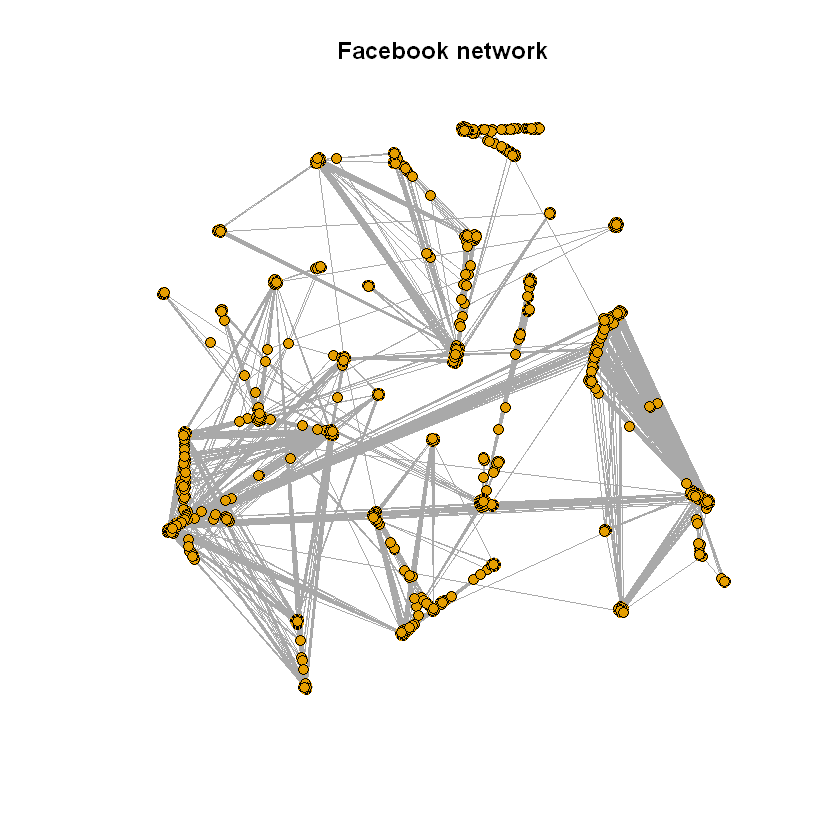

In [1]:
library('igraph')

g_edgelist = read_graph("facebook_combined.txt", format='ncol', directed = FALSE)
g = graph_from_edgelist(as_edgelist(g_edgelist), directed = FALSE)

plot(g, vertex.size=4, vertex.label=NA, main="Facebook network")

In [9]:
# Q5
fb_ego_graph = function(g) {
    g_ego = make_ego_graph(g, order=1, nodes=c('0'))[[1]]
    plot(g_ego, edge.arrow.size=.1, vertex.size=5, vertex.label=NA, main="node ID 1 ego network")
    
    print(paste("Network ID 1 number of nodes: ", vcount(g_ego)))
    print(paste("Network ID 1 number of edges: ", ecount(g_ego)))
    
    # Q6
    print(paste("Network ID 1 diameter: ", diameter(g_ego)))
}

fb_core = function(g, g_edgelist) {
    nodes = c(V(g_edgelist)$name)
    cores = c()
    degree_averages = c()
    for(i in nodes){
        num_neighbors = length(neighbors(g_edgelist,i))
        if(num_neighbors > 200){
            degree_averages = c(degree_averages, degree(g_edgelist, i))
            cores = c(cores,i)
        } 
    }

    print(paste('Number of core nodes: ', length(cores)))
    print(paste('Average degree: ', mean(degree_averages)))
}

core_communities = function(g, core_list=c(1, 108, 349, 484, 1087)) {
    for (core_id in core_list) {
        g_ego = make_ego_graph(g, order=1, nodes=c(core_id))[[1]]
        
        cfg = cluster_fast_greedy(g_ego)
        layout <-layout.fruchterman.reingold(g_ego)
        plot(cfg, g_ego, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2, main=paste("CFG for node ID ", core_id))
        print(paste("CFG Modularity: ", modularity(cfg)))
        
        ceb = cluster_edge_betweenness(g_ego)
        layout <-layout.fruchterman.reingold(g_ego)
        plot(ceb, g_ego, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2, main=paste("CEB for node ID ", core_id))
        print(paste("CEB Modularity: ", modularity(ceb)))
        
        ci = cluster_infomap(g_ego)
        layout <-layout.fruchterman.reingold(g_ego)
        plot(ci, g_ego, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2, main=paste("CI for node ID ", core_id))
        print(paste("CI Modularity: ", modularity(ci)))
        
    }
}

coreless_communities = function(g, core_list=c(1, 108, 349, 484, 1087)) {
    for (core_id in core_list) {
        g_ego = make_ego_graph(g, order=1, nodes=c(core_id))[[1]]
        g_ego = delete_vertices(g_ego, core_id)
        
        cfg = cluster_fast_greedy(g_ego)
        layout <-layout.fruchterman.reingold(g_ego)
        plot(cfg, g_ego, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2, main=paste("CFG for node ID ", core_id))
        print(paste("CFG Modularity: ", modularity(cfg)))
        
        ceb = cluster_edge_betweenness(g_ego)
        layout <-layout.fruchterman.reingold(g_ego)
        plot(ceb, g_ego, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2, main=paste("CEB for node ID ", core_id))
        print(paste("CEB Modularity: ", modularity(ceb)))
        
        ci = cluster_infomap(g_ego)
        layout <-layout.fruchterman.reingold(g_ego)
        plot(ci, g_ego, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2, main=paste("CI for node ID ", core_id))
        print(paste("CI Modularity: ", modularity(ci)))
        
    }
}

[1] "Network ID 1 number of nodes:  348"
[1] "Network ID 1 number of edges:  2866"
[1] "Network ID 1 diameter:  2"


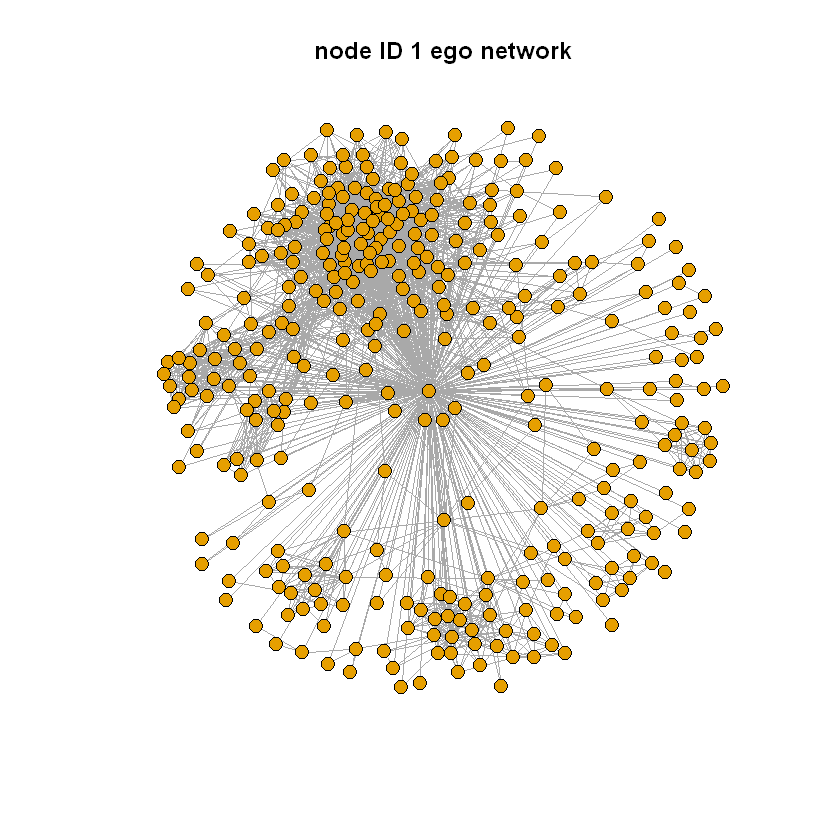

In [13]:
fb_ego_graph(g)

In [23]:
fb_core(g, g_edgelist)

[1] "Number of core nodes:  40"
[1] "Average degree:  279.375"


[1] "CFG Modularity:  0.413101372834235"


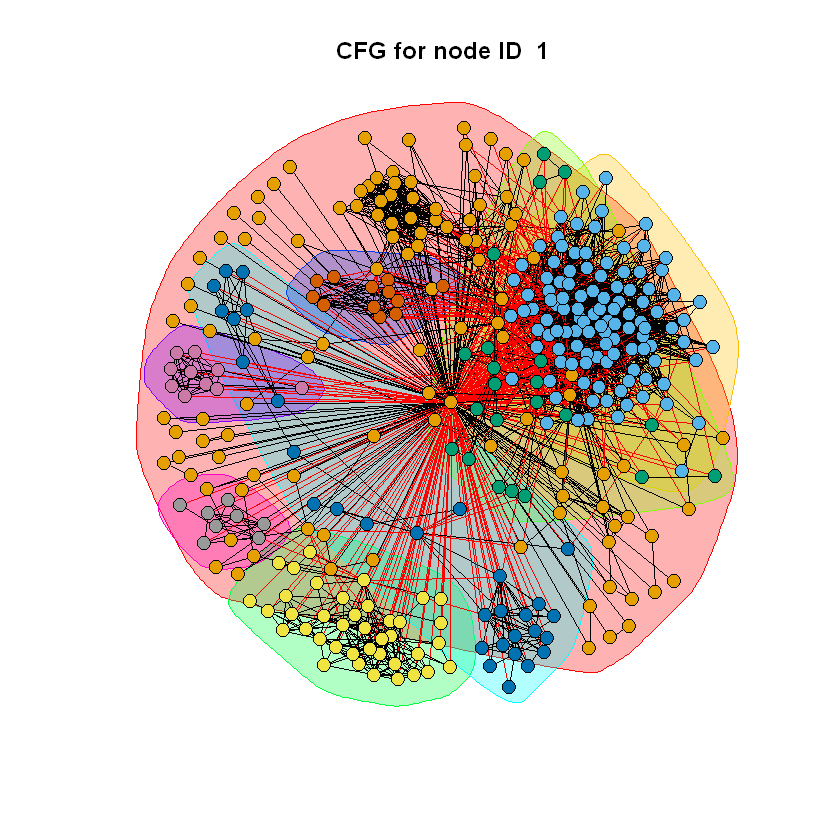

[1] "CEB Modularity:  0.353302172546335"


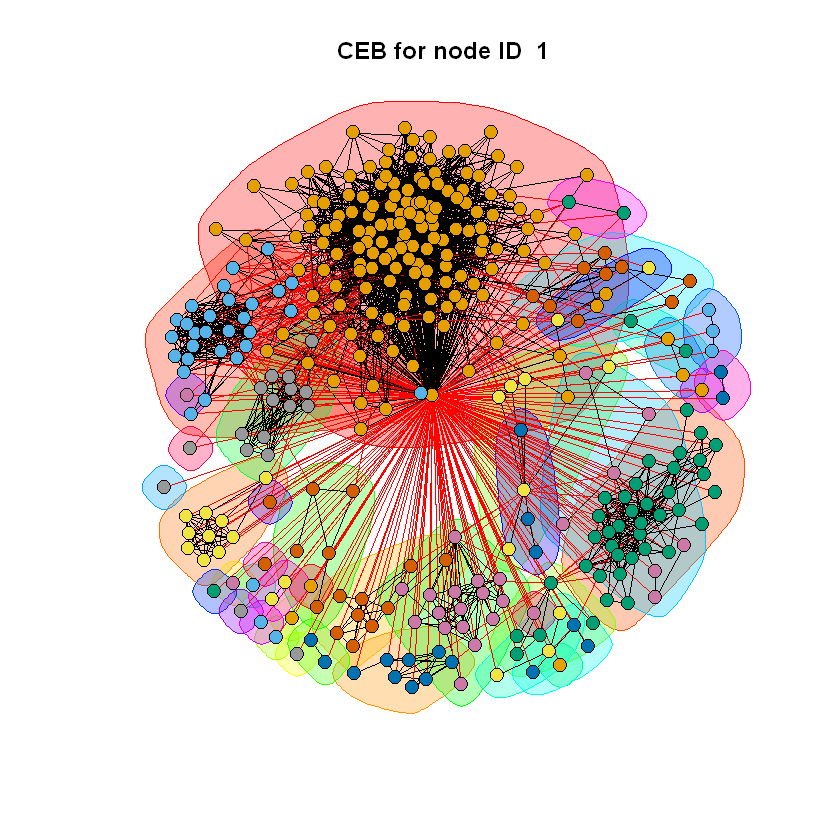

[1] "CI Modularity:  0.394125437243637"


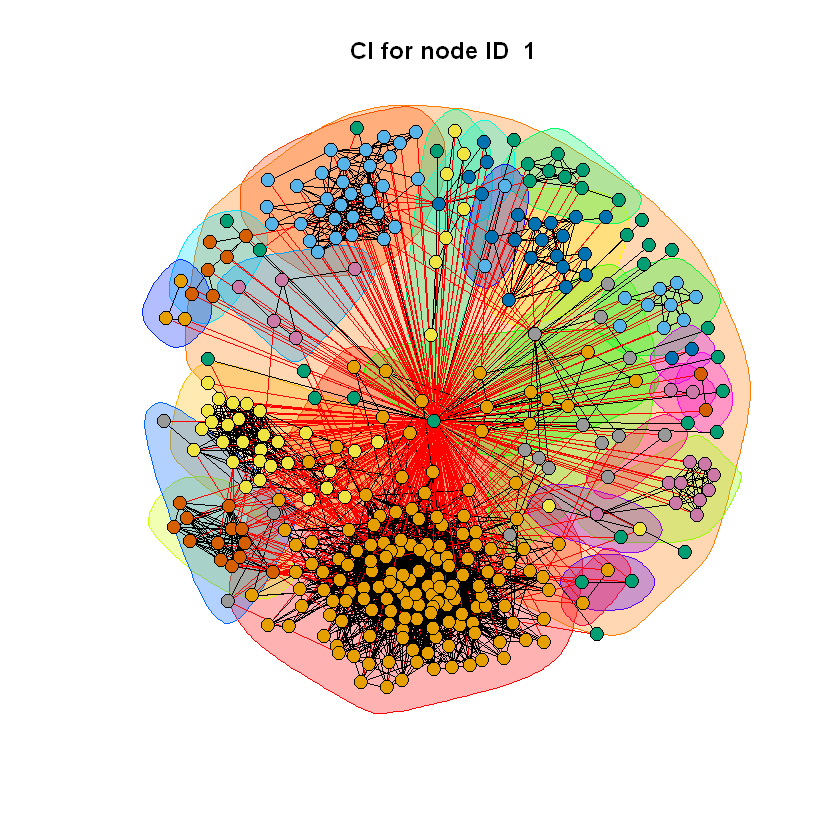

[1] "CFG Modularity:  0.435958134882439"


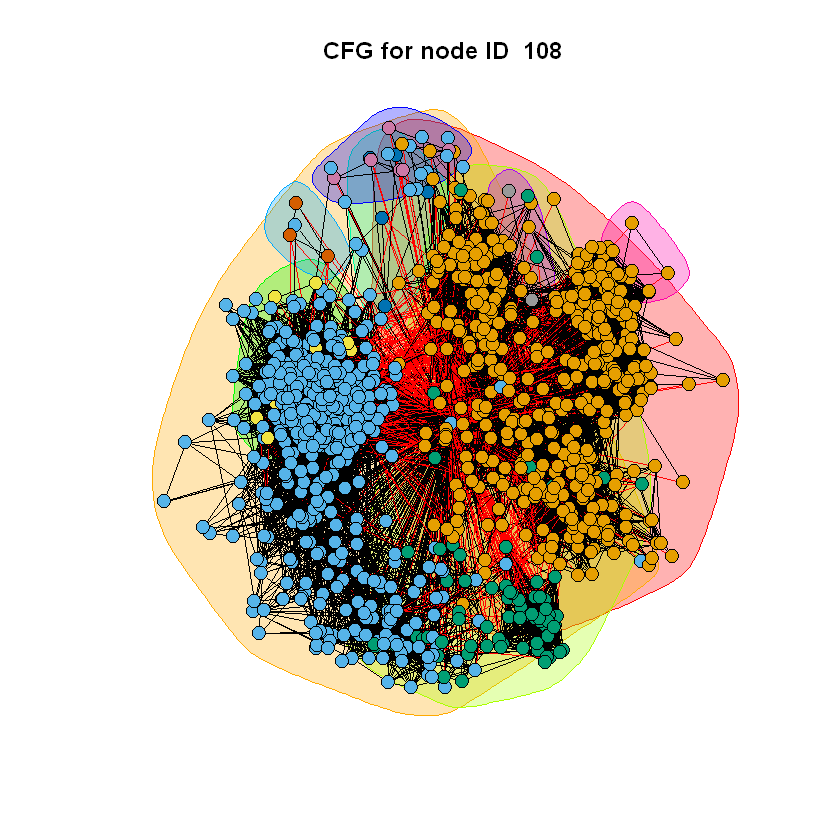

[1] "CEB Modularity:  0.506754916538902"


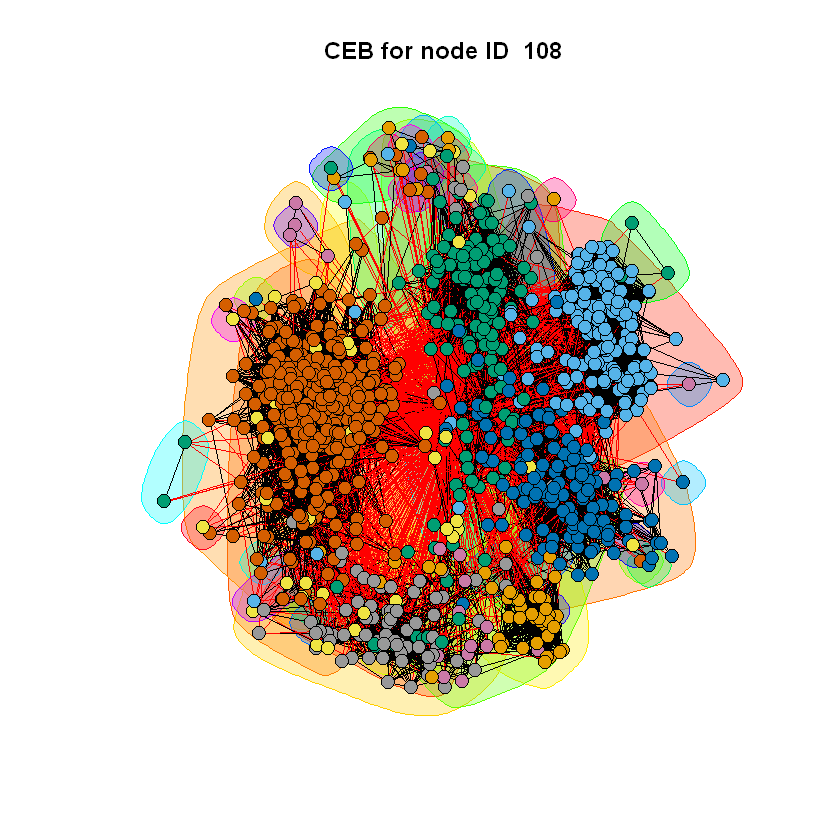

[1] "CI Modularity:  0.508223340384871"


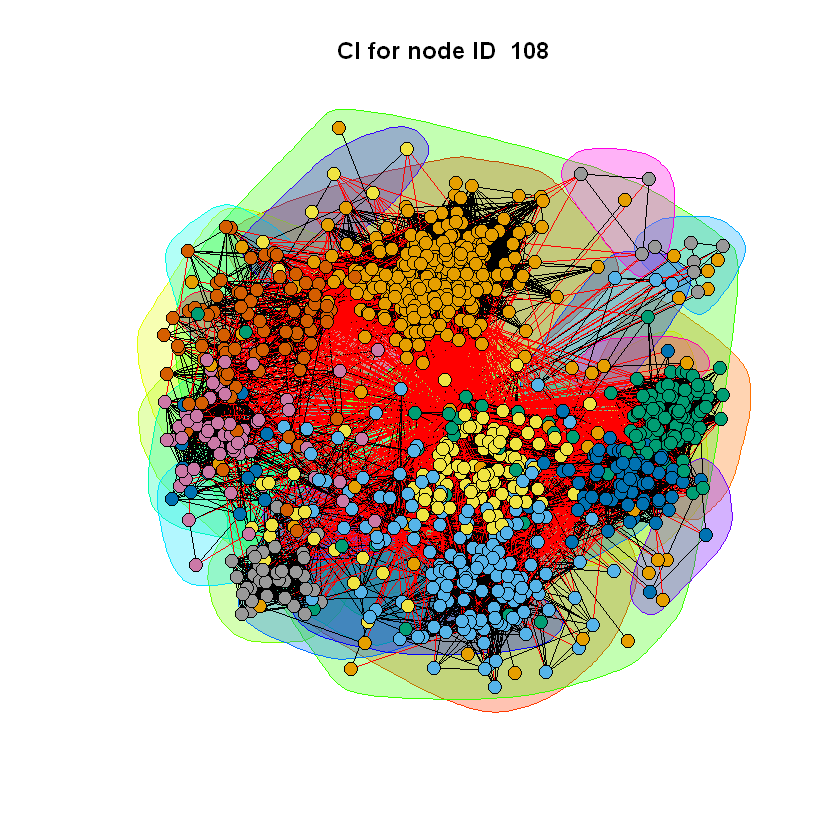

[1] "CFG Modularity:  0.250346079690513"


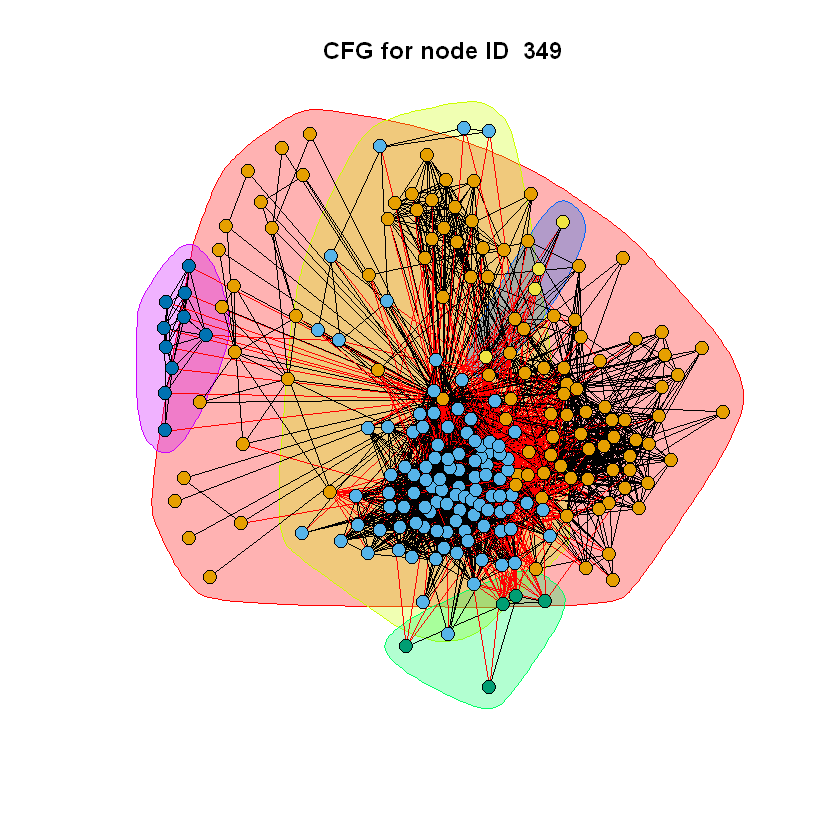

[1] "CEB Modularity:  0.133528021370078"


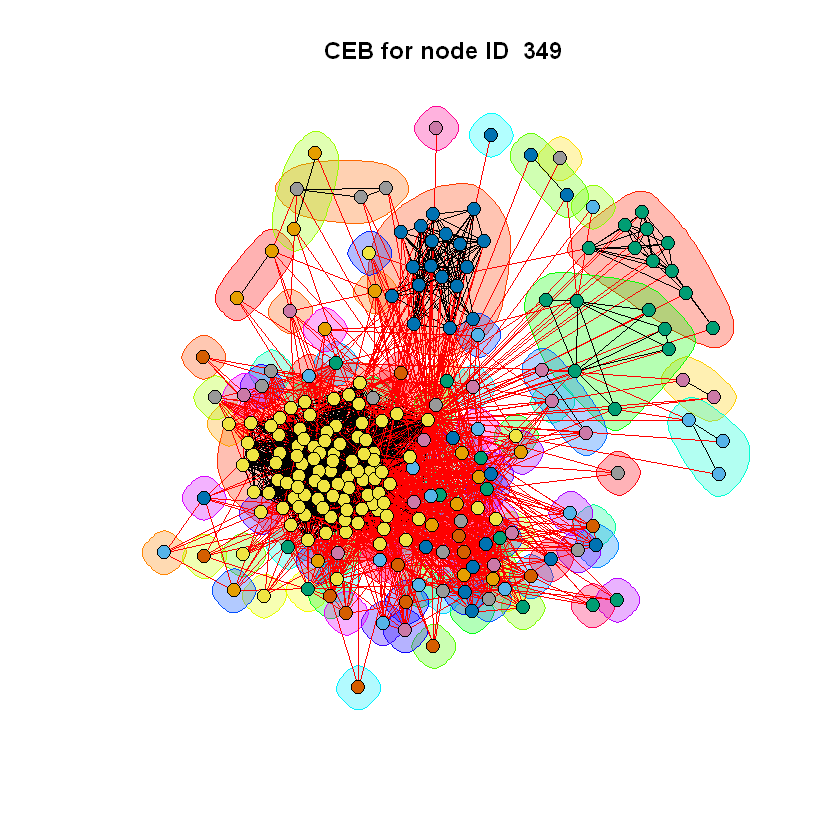

[1] "CI Modularity:  0.0954641960913581"


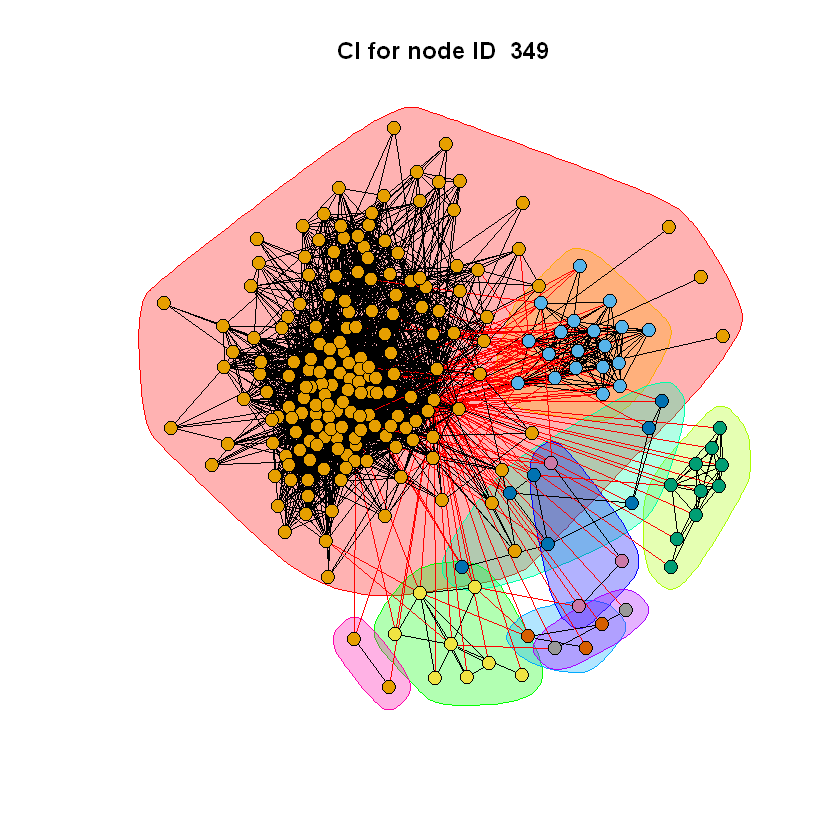

[1] "CFG Modularity:  0.100801420359395"


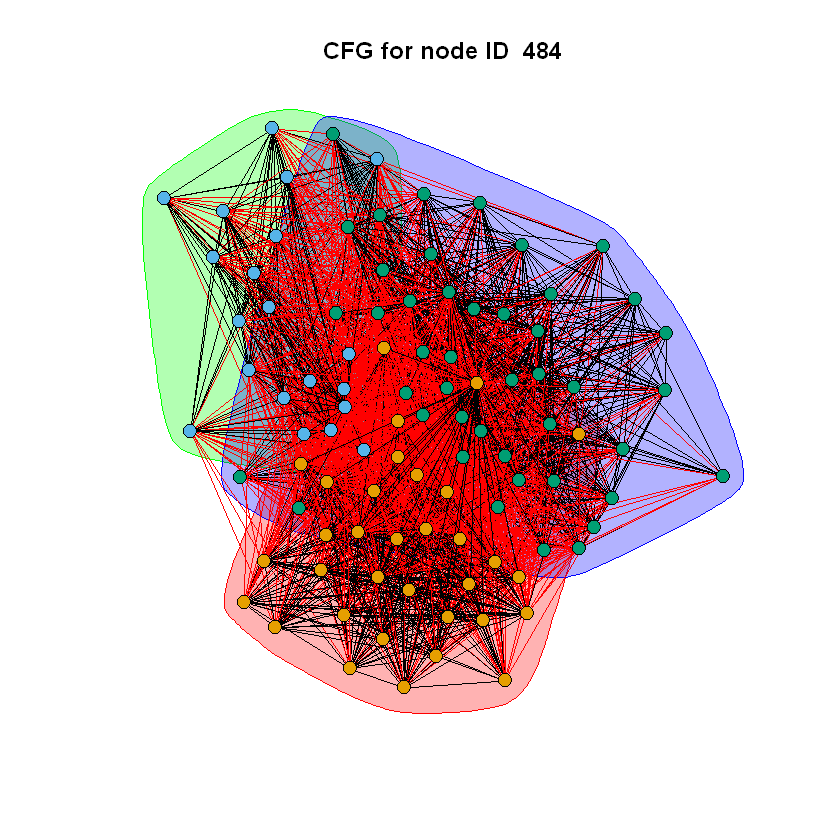

[1] "CEB Modularity:  0.0169962448889993"


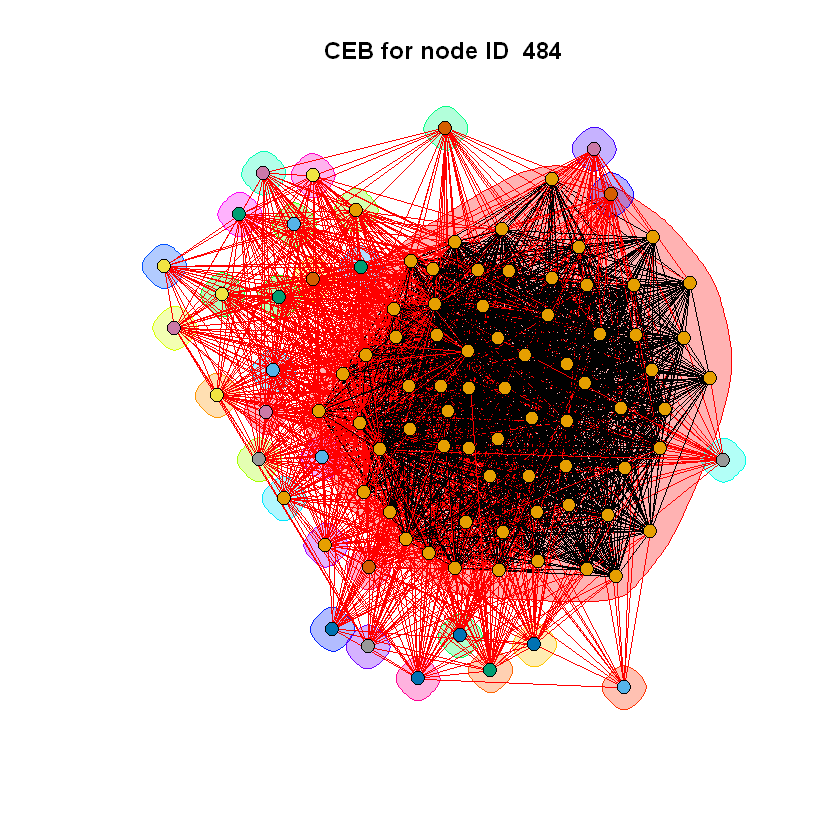

[1] "CI Modularity:  0"


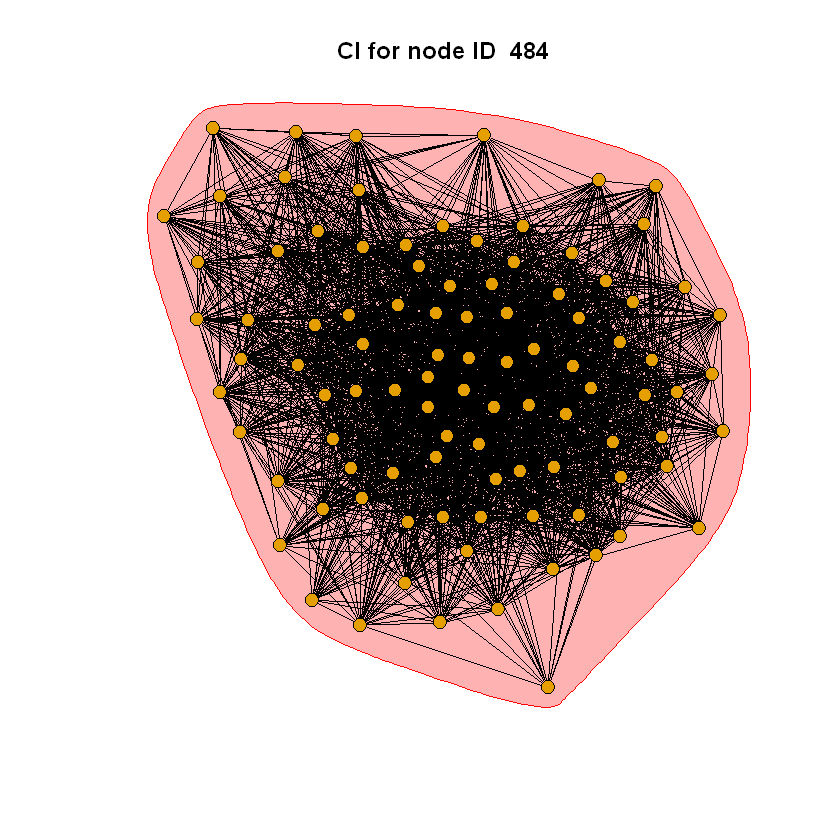

[1] "CFG Modularity:  0.11035630043977"


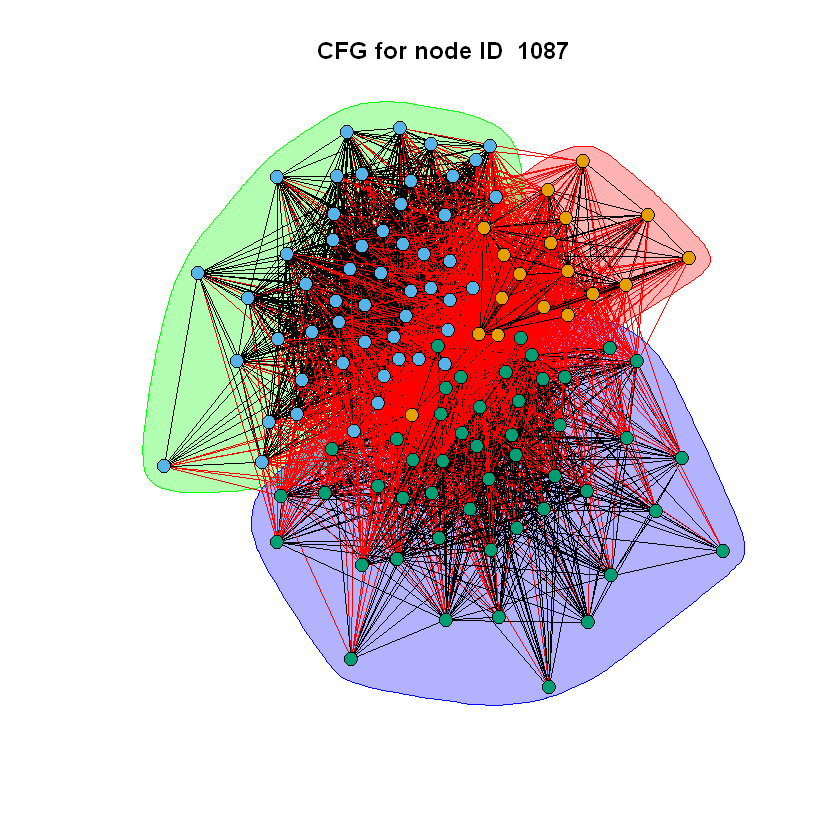

[1] "CEB Modularity:  0.00715033457807068"


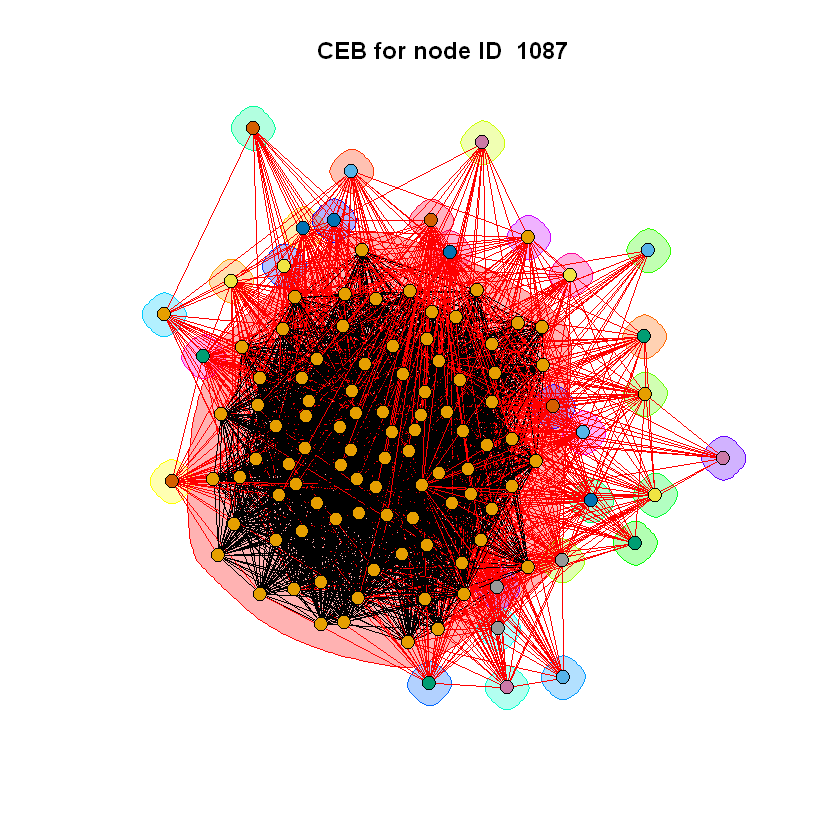

[1] "CI Modularity:  0"


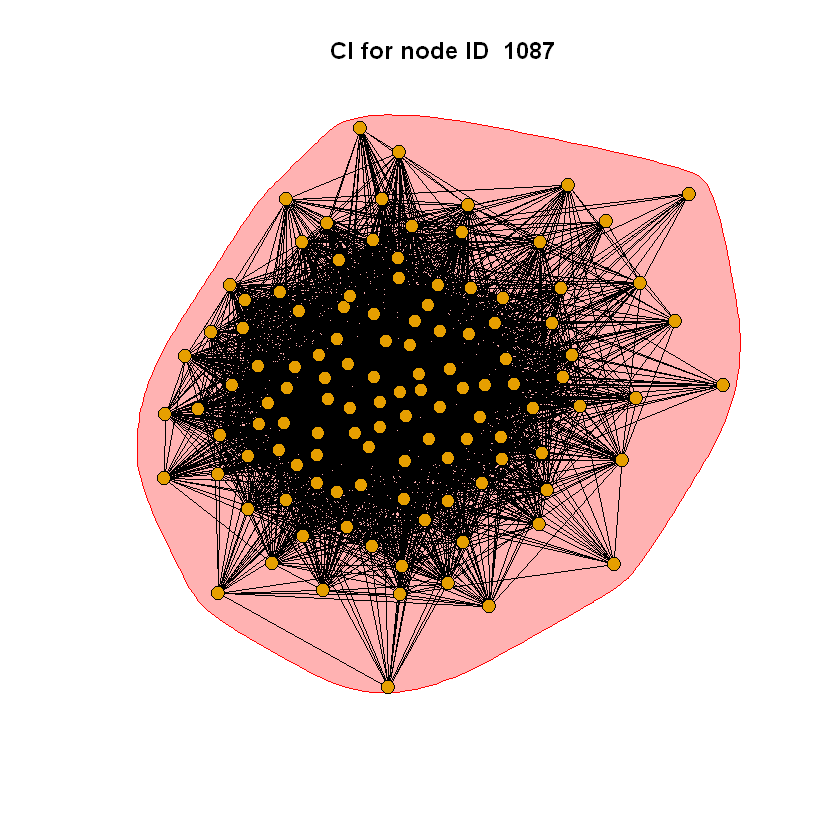

In [10]:
core_communities(g)